In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [2]:
fname = r'C:\Users\Dustin\Desktop\Masters Program\Spring Semester\Topics in Math\Agility Exercises\Research Firm\aArgentina Well Data Science Challenge_M.csv'
data = pd.read_csv(fname, encoding = 'latin-1')
data.describe(include = 'all')

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost
count,1.998000e+03,1998,1998,1998,1998,1998.000000,1998.000000,1537.000000,885,885,836,1998,1998,1998,1.998000e+03
unique,NaN,3,1840,238,38,NaN,NaN,NaN,844,849,797,45,2,8,NaN
top,NaN,V,x-1,Los Perales (PER),YPF SA,NaN,NaN,NaN,6/23/1995,10/3/2002,10/30/2002,Bajo Barreal,Unassigned,Chubut,NaN
freq,NaN,1334,46,168,660,NaN,NaN,NaN,3,3,3,391,1984,771,NaN
mean,9.065866e+13,NaN,NaN,NaN,NaN,-42.516174,-68.317730,5690.884656,NaN,NaN,NaN,NaN,NaN,NaN,7.893322e+05
std,2.847580e+12,NaN,NaN,NaN,NaN,5.342309,1.914794,4612.916898,NaN,NaN,NaN,NaN,NaN,NaN,4.393639e+05
min,8.799000e+13,NaN,NaN,NaN,NaN,-69.506300,-70.788750,3.618000,NaN,NaN,NaN,NaN,NaN,NaN,1.147218e+05
25%,8.899040e+13,NaN,NaN,NaN,NaN,-46.005871,-69.073895,3484.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.369574e+05
50%,8.899120e+13,NaN,NaN,NaN,NaN,-45.776925,-68.320367,5269.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.275993e+05
75%,9.499070e+13,NaN,NaN,NaN,NaN,-37.658590,-67.810833,7457.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.356654e+05


In [3]:
data.groupby(by = 'Well type code').agg(['count', 'mean'])

Well ID               latitude            longitude             \
                 count          mean    count       mean     count       mean   
Well type code                                                                  
H                   10  9.099153e+13       10 -38.964141        10 -67.866094   
UN                 654  9.002894e+13      654 -43.811635       654 -68.108687   
V                 1334  9.096489e+13     1334 -41.907694      1334 -68.423601   

               Measured_Depth               well_cost                
                        count          mean     count          mean  
Well type code                                                       
H                          10  12334.500000        10  2.538925e+06  
UN                        634   5625.433144       654  8.741440e+05  
V                         893   5662.956443      1334  7.346374e+05

#### Describe the Null's and abnormal depths

In [4]:
data.isnull().sum()/data.shape[0]

Well ID            0.000000
Well type code     0.000000
well_number        0.000000
Field_Name         0.000000
Operator           0.000000
latitude           0.000000
longitude          0.000000
Measured_Depth     0.230731
Drilling_Start     0.557057
Drilling_end       0.557057
Completion_Date    0.581582
Reservoir          0.000000
play_name          0.000000
state_name         0.000000
well_cost          0.000000
dtype: float64

##### Looking at the Data, I would lose less data by dropping the Depth Null values and filling in time as opposed to Dropping Time Null values and filling Depth.

In [5]:
data.loc[data['Measured_Depth'].notnull(), :].groupby(by = 'Well type code').agg(['count', 'mean', 'std','min', 'median', 
                                                                                 'max'])['Measured_Depth']

,count,mean,std,min,median,max
Well type code,,,,,,
H,10,12334.500000,985.270437,9576.000,12662.0,12877.0
UN,634,5625.433144,2894.240604,3.618,6038.0,16837.0
V,893,5662.956443,5494.454604,3.946,5049.0,151111.0


C:\Users\Dustin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dustin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Measured Depth Histogram')

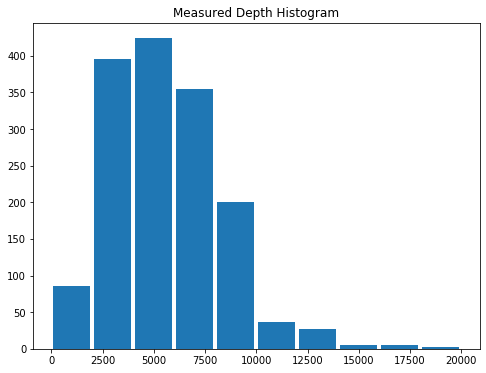

In [6]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(data['Measured_Depth'], range = (0, 20000), rwidth = .9, align = 'mid')
ax.set_title('Measured Depth Histogram')
#ax.hist(data['Measured_Depth'], range = (1200, 10000), rwidth = .9, align = 'mid')
#ax.hist(data['Measured_Depth'], bins = 10, range = (4000, 20000), rwidth = .9, align = 'mid', alpha = 0.7)

In [7]:
print('{}% of the data falls in meters range'.format(
    (data['Measured_Depth'].isin(range(1200,10001)).sum()/(data['Measured_Depth'].notnull().sum()))*100))
print('{}% of the data falls in the ft range'.format(
    (data['Measured_Depth'].isin(range(4000,32000)).sum()/(data['Measured_Depth'].notnull().sum()))*100))

92.06245933636956% of the data falls in meters range
68.57514638906962% of the data falls in the ft range


Based on the above values and histogram, I move forward with the assumption of the measured depth being meters.
- from here I will start to drop the null values and values that fall outside of range (1200, 13000) meters
- NOTE: I realize that 12750 meters is 47800' and is largely unreasonable, but I want to retain some of the H wells. Is this wrong?

In [8]:
data = data[data['Measured_Depth']>= 1200]
data = data[data['Measured_Depth']<= 12750]
data.describe().astype(int)

,Well ID,latitude,longitude,Measured_Depth,well_cost
count,1470,1470,1470,1470,1470
mean,-2147483648,-41,-68,5630,773907
std,-2147483648,5,1,2359,415376
min,-2147483648,-69,-70,1400,114721
25%,-2147483648,-45,-69,3631,464148
50%,-2147483648,-45,-68,5291,726311
75%,-2147483648,-37,-67,7443,1000755
max,-2147483648,-22,-29,12746,2994265


In [9]:
data.isnull().sum()/data.shape[0]

Well ID            0.000000
Well type code     0.000000
well_number        0.000000
Field_Name         0.000000
Operator           0.000000
latitude           0.000000
longitude          0.000000
Measured_Depth     0.000000
Drilling_Start     0.480272
Drilling_end       0.480272
Completion_Date    0.504082
Reservoir          0.000000
play_name          0.000000
state_name         0.000000
well_cost          0.000000
dtype: float64

#### Calculate a few other columns for support
- drill time
- completion time
- cost/ft

#### then I will estimate drill time and completion based off of cost and well type. Then I will calculate the following column
- cost/day
- ft/day
- total time

In [10]:
"""
Note: when getting date time values - have to divide by 10^9 to get into seconds, then by another (24*60*60) 
to get into days. This is because it is given in nanoseconds

Also, To get rid of the datetime attribute, get the values/datetime of same size to get integers
"""
dt_to_days = ((10**9)*24*60*60)

data['Drill_time'] = pd.to_datetime(data['Drilling_end'])-pd.to_datetime(data['Drilling_Start'])
data['Drill_time'] = list(data['Drill_time'].values/np.timedelta64(dt_to_days, 'ns'))

data['Completion_time'] = pd.to_datetime(data['Completion_Date'])-pd.to_datetime(data['Drilling_end'])
data['Completion_time'] = list(data['Completion_time'].values/np.timedelta64(dt_to_days, 'ns'))

data.describe().astype(int)

,Well ID,latitude,longitude,Measured_Depth,well_cost,Drill_time,Completion_time
count,1470,1470,1470,1470,1470,764,729
mean,-2147483648,-41,-68,5630,773907,6,36
std,-2147483648,5,1,2359,415376,1431,1403
min,-2147483648,-69,-70,1400,114721,-32798,-26465
25%,-2147483648,-45,-69,3631,464148,8,14
50%,-2147483648,-45,-68,5291,726311,13,21
75%,-2147483648,-37,-67,7443,1000755,25,31
max,-2147483648,-22,-29,12746,2994265,22050,26591


In [11]:
data['cost_ft'] = data['well_cost']/data['Measured_Depth']
data.describe().astype(int)

,Well ID,latitude,longitude,Measured_Depth,well_cost,Drill_time,Completion_time,cost_ft
count,1470,1470,1470,1470,1470,764,729,1470
mean,-2147483648,-41,-68,5630,773907,6,36,138
std,-2147483648,5,1,2359,415376,1431,1403,46
min,-2147483648,-69,-70,1400,114721,-32798,-26465,24
25%,-2147483648,-45,-69,3631,464148,8,14,107
50%,-2147483648,-45,-68,5291,726311,13,21,135
75%,-2147483648,-37,-67,7443,1000755,25,31,167
max,-2147483648,-22,-29,12746,2994265,22050,26591,319


In [12]:
data.loc[data['Drill_time']<=0, 'Drill_time'] = None
data.loc[data['Drill_time']>200, 'Drill_time'] = None
data.loc[data['Completion_time']<=0, 'Completion_time'] = None
data.loc[data['Completion_time']>200, 'Completion_time'] = None

In [13]:
data.groupby(by = 'Well type code').agg(['count','mean', 'median'])[['Drill_time', 'Completion_time']].astype(int)

Drill_time             Completion_time            
                    count mean median           count mean median
Well type code                                                   
H                       7   47     42               6   33     32
UN                      2   22     22               2   29     29
V                     734   19     13             698   25     21

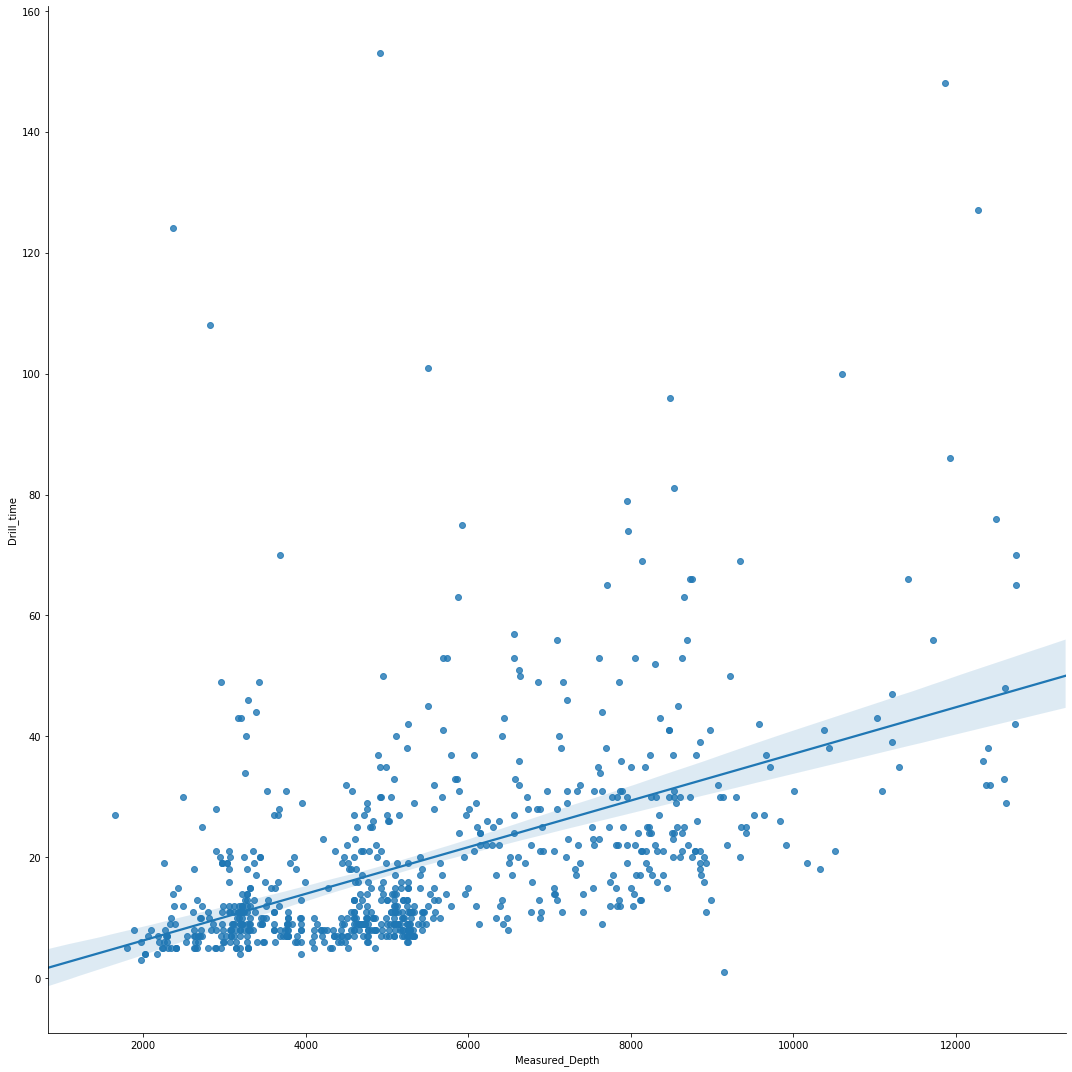

In [14]:
sns.lmplot('Measured_Depth', 'Drill_time', data = data, height = 15, aspect = 1)

With seeing a loose linear relationship, I feel it will be more accurate to fill with linear regression than mean, so I went this route for both Drill and Completion Time.

In [15]:
dt = data[['Drill_time', 'Measured_Depth', 'well_cost']][data['Drill_time'].notnull()]
dt.describe().astype(int)

,Drill_time,Measured_Depth,well_cost
count,743,743,743
mean,19,5449,715215
std,17,2283,455046
min,1,1660,114721
25%,9,3608,365710
50%,13,5026,653783
75%,25,6946,908610
max,153,12746,2994265


In [16]:
dt_lm = LinearRegression()
dt_lm.fit(dt[['Measured_Depth', 'well_cost']], dt['Drill_time'])
#dt_lm.score(dt[['Measured_Depth', 'well_cost']], dt['Drill_time'])
np.sqrt(mse(dt['Drill_time'], dt_lm.predict(dt[['Measured_Depth', 'well_cost']])))#/np.mean(dt['Drill_time'])

14.512160882083606

In [17]:
dt_index = data.loc[data['Drill_time'].isnull(),'Drill_time'].index
data.loc[dt_index, 'Drill_time'] = dt_lm.predict(data.loc[dt_index,['Measured_Depth', 'well_cost']])
data.loc[data['Drill_time'] < 0, 'Drill_time'] = 0

In [18]:
data.describe()

,Well ID,latitude,longitude,Measured_Depth,well_cost,Drill_time,Completion_time,cost_ft
count,1.470000e+03,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,706.000000,1470.000000
mean,9.062292e+13,-41.696395,-68.420636,5630.722449,7.739077e+05,19.777764,25.481586,138.751785
std,2.883468e+12,5.413857,1.895907,2359.452229,4.153760e+05,14.922901,18.407687,46.952954
min,8.799000e+13,-69.506300,-70.788750,1400.000000,1.147218e+05,0.000000,2.000000,24.189638
25%,8.799150e+13,-45.915410,-69.082923,3631.250000,4.641481e+05,9.000000,14.000000,107.439402
50%,8.899110e+13,-45.726660,-68.457440,5291.500000,7.263112e+05,17.000000,21.000000,135.858861
75%,9.449088e+13,-37.337499,-67.955713,7443.000000,1.000756e+06,27.803802,31.000000,167.667714
max,9.899080e+13,-22.431936,-29.971058,12746.000000,2.994266e+06,153.000000,164.000000,319.995031


In [19]:
ct = data[['Completion_time', 'Measured_Depth', 'well_cost']][data['Completion_time'].notnull()]
ct_lm = LinearRegression()
ct_lm.fit(ct[['Measured_Depth', 'well_cost']], ct['Completion_time'])
#dt_lm.score(dt[['Measured_Depth', 'well_cost']], dt['Drill_time'])
np.sqrt(mse(ct['Completion_time'], ct_lm.predict(ct[['Measured_Depth', 'well_cost']])))#/np.mean(dt['Drill_time'])

17.900374600734263

In [20]:
ct_index = data.loc[data['Completion_time'].isnull(),'Completion_time'].index
data.loc[ct_index, 'Completion_time'] = ct_lm.predict(data.loc[ct_index,['Measured_Depth', 'well_cost']])
data.loc[data['Completion_time'] < 0, 'Completion_time'] = 0

In [21]:
data.describe().astype(int)

,Well ID,latitude,longitude,Measured_Depth,well_cost,Drill_time,Completion_time,cost_ft
count,1470,1470,1470,1470,1470,1470,1470,1470
mean,-2147483648,-41,-68,5630,773907,19,25,138
std,-2147483648,5,1,2359,415376,14,13,46
min,-2147483648,-69,-70,1400,114721,0,2,24
25%,-2147483648,-45,-69,3631,464148,9,18,107
50%,-2147483648,-45,-68,5291,726311,17,24,135
75%,-2147483648,-37,-67,7443,1000755,27,29,167
max,-2147483648,-22,-29,12746,2994265,153,164,319


In [22]:
data['total_time'] = data['Drill_time']+data['Completion_time']
data['cost_day'] = data['well_cost']/data['total_time']
data['ft_day'] = data['Measured_Depth']/data['total_time']
data.describe().astype(int)

,Well ID,latitude,longitude,Measured_Depth,well_cost,Drill_time,Completion_time,cost_ft,total_time,cost_day,ft_day
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,-2147483648,-41,-68,5630,773907,19,25,138,45,18909,133
std,-2147483648,5,1,2359,415376,14,13,46,23,9311,46
min,-2147483648,-69,-70,1400,114721,0,2,24,12,795,16
25%,-2147483648,-45,-69,3631,464148,9,18,107,28,12463,109
50%,-2147483648,-45,-68,5291,726311,17,24,135,42,17576,126
75%,-2147483648,-37,-67,7443,1000755,27,29,167,57,24195,149
max,-2147483648,-22,-29,12746,2994265,153,164,319,221,61877,523


In [23]:
fname2 = r'C:\Users\Dustin\Desktop\Masters Program\Spring Semester\Topics in Math\Agility Exercises\Research Firm\aArgentina_edited.csv'
#data.to_csv(fname2)
#data = pd.read_csv(fname2, encoding = 'latin-1')

### Look at drilling performance and operation efficiency

In [23]:
data.groupby(by = 'Well type code').mean()[['Measured_Depth', 'Drill_time', 'Completion_time', 'well_cost']]

,Measured_Depth,Drill_time,Completion_time,well_cost
Well type code,,,,
H,12128.285714,47.285714,33.243928,2.487113e+06
UN,5814.082631,19.783105,25.992642,8.477755e+05
V,5453.463218,19.552796,25.582503,7.097744e+05


In [25]:
data.groupby(by = 'Well type code').agg({'Well ID':'count', 'cost_ft':'mean', 'cost_day':'mean', 'ft_day':'mean'})

,Well ID,cost_ft,cost_day,ft_day
Well type code,,,,
H,7,203.488934,31866.477559,157.238378
UN,593,155.201228,19407.165527,124.255962
V,870,127.018820,18465.653555,140.376247


In [24]:
ops_base = data.groupby('Operator')
ops = ops_base.agg({'Well ID':'count', 'cost_ft':'mean', 'cost_day':'mean', 'ft_day':'mean'}).sort_values(by = 'Well ID', ascending = False)
ops

,Well ID,cost_ft,cost_day,ft_day
Operator,,,,
YPF SA,489,137.841095,19028.580557,135.329091
YPF S.A.,260,101.538724,16429.933820,147.735496
Pan American Energy,191,128.868453,16182.063133,123.681359
Sinopec Argentina Exploration & Production,111,168.567537,23128.424069,136.301436
Companãas Asociadas Petroleras,57,173.076272,20930.846902,121.055411
Cri Holding,56,226.770453,24221.920724,107.186520
Petrobras Argentina,50,129.824292,20347.786402,159.133498
Pluspetrol,38,164.156416,16888.169377,103.287769
Petrolera El Trebol,33,136.566479,17125.428925,125.191251


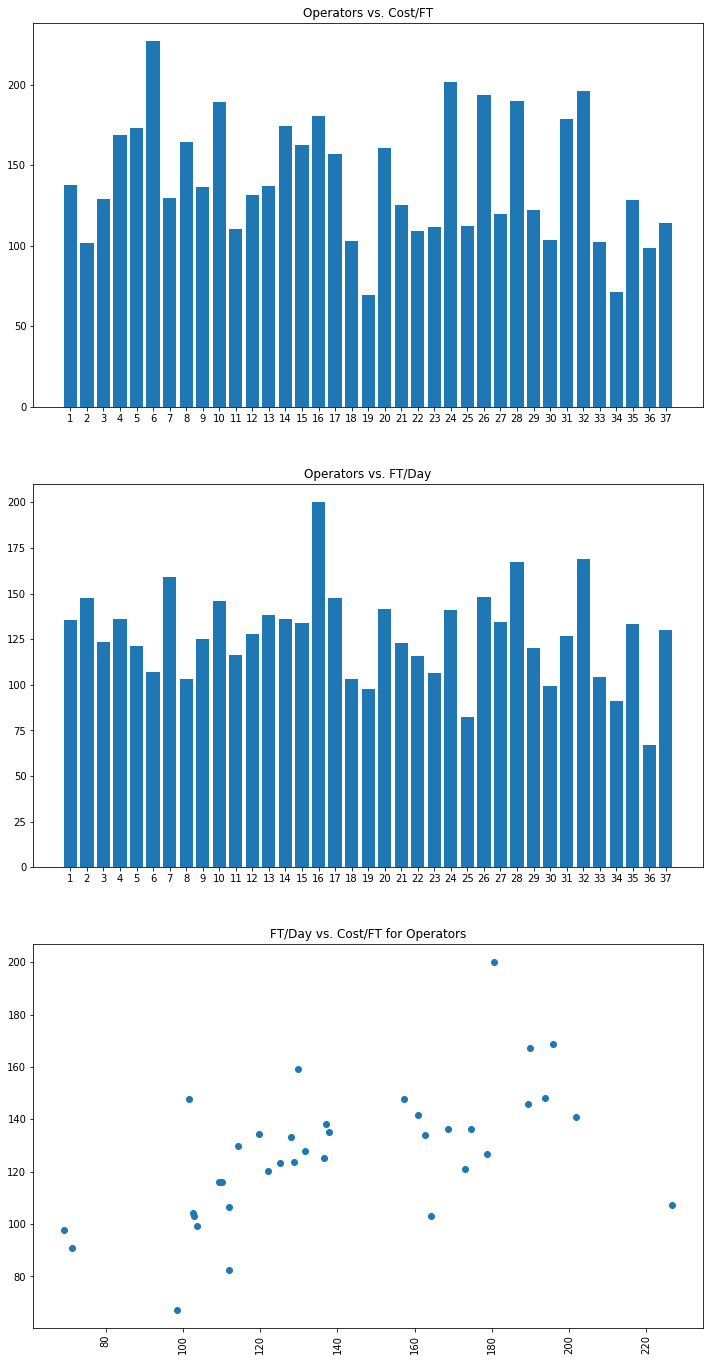

In [25]:
fig1, ax1 = plt.subplots(3,1, figsize = (12,24))
#PLOT COST/FT IN ORDER OF JOB COUNT (DESCENDING)
ax1[0].bar(x = ops.index, height = ops['cost_ft'])
ax1[0].set_title('Operators vs. Cost/FT')
ax1[0].set_xticklabels([i for i in range(1, len(ops.index)+1)])
#PLOT FT/DAY IN ORDER OF JOB COUNT (DESCENDING)
ax1[1].bar(x = ops.index, height = ops['ft_day'])
ax1[1].set_title('Operators vs. FT/Day')
ax1[1].set_xticklabels([i for i in range(1, len(ops.index)+1)])
#PLOT COST/FT VS. FT/DAY
ax1[2].scatter(ops['cost_ft'], ops['ft_day'])
ax1[2].set_title('FT/Day vs. Cost/FT for Operators')
ax1[2].tick_params(axis='x', rotation=90)

In [58]:
op_type = data.groupby(['Operator', 'Well type code']).agg({'Well type code': 'count'})
op_type = op_type.swaplevel('Operator', 'Well type code')

Well type code
Well type code Operator                                
UN             Capex                                  1
V              Capex                                  1
UN             Chanares Herrados                      9
               Chevron Argentina S.R.L.               3
V              Chevron Argentina S.R.L.               3

In [60]:
v = 870; un = 593; h = 7

print('Top Vertical Well operators:\n{}\n\n'.format(op_type.loc[('V'),:].sort_values(by = 'Well type code', ascending = False).head()/v))

print('Top Unconventional Well operators:\n{}\n\n'.format(op_type.loc[('UN'),:].sort_values(by = 'Well type code', ascending = False).head()/un))

print('Top Horizontal Well operators:\n{}'.format(op_type.loc[('H'),:].sort_values(by = 'Well type code', ascending = False).head()/h))

Top Vertical Well operators:
                                 Well type code
Operator                                       
YPF SA                                 0.559770
YPF S.A.                               0.295402
Petrobras Argentina                    0.057471
Petroquimica Comodoro Rivadavia        0.020690
Tecpetrol                              0.019540


Top Unconventional Well operators:
                                            Well type code
Operator                                                  
Pan American Energy                               0.322091
Sinopec Argentina Exploration & Production        0.185497
Companãas Asociadas Petroleras                   0.096121
Cri Holding                                       0.094435
Petrolera El Trebol                               0.055649


Top Horizontal Well operators:
                                Well type code
Operator                                      
Ysur Energãa Argentina S.R.L.        0.857143
Pluspetrol 

In [95]:
op_type = data.groupby(['Well type code','Operator']).agg({'Well ID': 'count', 'ft_day':'mean', 'cost_ft':'mean'})
type_count = {'V': 870, 'UN':593, 'H':7}

for i in ['V', 'UN', 'H']:
    print('Top {} Well operators:\n{}\n\n'.format(i,
        op_type.loc[(i),:].sort_values(by = 'ft_day', ascending = False).head(n = 3)))

Top V Well operators:
                                            Well ID      ft_day     cost_ft
Operator                                                                   
Sinopec Argentina Exploration & Production        1  244.048780  141.534821
Petrolera Entre Lomas                            10  200.295046  180.438237
Capex                                             1  172.208413  180.937432


Top UN Well operators:
                   Well ID      ft_day     cost_ft
Operator                                          
Pluspetrol Energy        1  168.865158  195.749825
Capex                    1  162.599121  198.730678
Unknown                  2  148.163501  193.833353


Top H Well operators:
                                Well ID      ft_day     cost_ft
Operator                                                       
Ysur Energãa Argentina S.R.L.        6  162.081456  210.537769
Pluspetrol                            1  128.179910  161.195927




In [96]:
for i in ['V', 'UN', 'H']:
    print('Top {} Well operators:\n{}\n\n'.format(i,
        op_type.loc[(i),:].sort_values(by = ['Well ID', 'ft_day'], ascending = False).head(n = 3)))

Top V Well operators:
                     Well ID      ft_day     cost_ft
Operator                                            
YPF SA                   487  135.365766  137.890805
YPF S.A.                 257  148.112170  101.861366
Petrobras Argentina       50  159.133498  129.824292


Top UN Well operators:
                                            Well ID      ft_day     cost_ft
Operator                                                                   
Pan American Energy                             191  123.681359  128.868453
Sinopec Argentina Exploration & Production      110  135.321915  168.813289
Companãas Asociadas Petroleras                  57  121.055411  173.076272


Top H Well operators:
                                Well ID      ft_day     cost_ft
Operator                                                       
Ysur Energãa Argentina S.R.L.        6  162.081456  210.537769
Pluspetrol                            1  128.179910  161.195927




In [84]:
op_field = data.groupby(['Operator', 'Field_Name', 'Well type code', 'Reservoir']).agg({'Field_Name': 'count', 'ft_day':'mean', 'cost_ft':'mean'})
op_field = op_field.rename(columns = {'Field_Name': 'Count'})
op_field.sort_values(by = 'Count', ascending = False).head(n = 10)

,,,,Count,ft_day,cost_ft
Operator,Field_Name,Well type code,Reservoir,,,
YPF SA,Los Perales (PER),V,Bajo Barreal,112,156.476750,165.369378
YPF S.A.,Senal Picada (SPI),V,Quintuco,69,123.762598,79.194032
Cri Holding,Kilom8 (KM8),UN,Salamanca,52,106.001438,234.580322
Companãas Asociadas Petroleras,Diadema (DIA),UN,Unassigned,51,121.688577,174.178982
YPF S.A.,El Medanito (EMD),V,Quintuco,34,142.832809,74.466645
Sinopec Argentina Exploration & Production,El Cordon (COR),UN,Mina El Carmen,33,137.190274,170.681027
Pan American Energy,Canadon Grande (CGR),UN,Comodoro Rivadavia,32,122.055599,111.551456
YPF S.A.,El Medanito (EMD),V,Sierras Blancas,32,157.768260,94.846469
Pan American Energy,Cerro Dragon (CDR),UN,Comodoro Rivadavia,30,120.812718,117.873058


### Look at top reservoirs
- most jobs
- avg job speed
- avg depth
- types of wells

In [85]:
res = data.groupby(['Reservoir']).agg({'Well ID':'count', 'ft_day':'mean', 'Measured_Depth':'mean', 'well_cost':'mean',
                                      'cost_ft':'mean'}).sort_values(by = 'Well ID', ascending = False).astype(int)
res['% of total Wells'] = res['Well ID']/1470
res.head(n=10)

,Well ID,ft_day,Measured_Depth,well_cost,cost_ft,% of total Wells
Reservoir,,,,,,
Bajo Barreal,240,150,4830,774525,165,0.163265
Comodoro Rivadavia,210,123,6858,818161,120,0.142857
Unassigned,207,117,5440,783883,146,0.140816
Quintuco,138,136,4074,385411,91,0.093878
Grupo Chubut,98,167,6472,872978,131,0.066667
Mina El Carmen,65,138,6806,1136285,168,0.044218
Agrio,62,110,4787,469613,93,0.042177
Salamanca,52,106,2017,467119,234,0.035374
Rio Blanco,42,145,8262,1138363,137,0.028571


In [72]:
res_type = data.groupby(['Reservoir', 'Well type code']).agg({'Well ID':'count'}).sort_values(by = 'Well ID', ascending = False)
res_type = res_type.swaplevel('Reservoir', 'Well type code')
res_type.head(n =5)

,,Well ID
Well type code,Reservoir,
V,Bajo Barreal,226
UN,Comodoro Rivadavia,202
V,Quintuco,137
UN,Unassigned,118
V,Grupo Chubut,98


In [74]:
v = 870; un = 593; h = 7

print('Top Vertical Well Reservoirs:\n{}\n\n'.format(res_type.loc[('V'),:].sort_values(by = 'Well ID', ascending = False).head()/v))

print('Top Unconventional Well Reservoirs:\n{}\n\n'.format(res_type.loc[('UN'),:].sort_values(by = 'Well ID', ascending = False).head()/un))

print('Top Horizontal Well Reservoirs:\n{}'.format(res_type.loc[('H'),:].sort_values(by = 'Well ID', ascending = False).head()/h))

Top Vertical Well Reservoirs:
               Well ID
Reservoir             
Bajo Barreal  0.259770
Quintuco      0.157471
Grupo Chubut  0.112644
Unassigned    0.102299
Agrio         0.064368


Top Unconventional Well Reservoirs:
                     Well ID
Reservoir                   
Comodoro Rivadavia  0.340641
Unassigned          0.198988
Mina El Carmen      0.106239
Salamanca           0.087690
Centenario          0.045531


Top Horizontal Well Reservoirs:
              Well ID
Reservoir            
Lajas        0.857143
Vaca Muerta  0.142857


### Conclusion:
- The companies used the most had a descent rate and middle of the road price - maybe some other factor like safety
- The reservoir with the most holes is: V = Bajo Barreal, UN = Comodoro Rivadavia, H = Lajas

I feel like there are a lot more unconventional Fields/Horizontal wells. That would be a great area to look into making less holse but being able to complete more area by use of Fracturing.

I spent approximately 9 hours on this.

{'whiskers': [<matplotlib.lines.Line2D at 0x247dea21ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x247dea2c828>,
 'boxes': [<matplotlib.lines.Line2D at 0x247de9fbc18>],
 'medians': [<matplotlib.lines.Line2D at 0x247dea2ceb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x247dea2cf98>],
 'means': []}

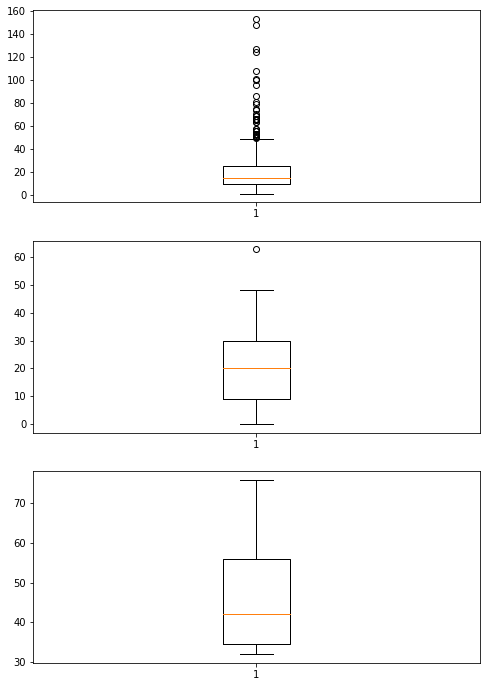

In [79]:
fig1, ax1 = plt.subplots(3,1, figsize = (8,12))
ax1[0].boxplot(data['Drill_time'][data['Well type code'] == 'V'])
ax1[1].boxplot(data['Drill_time'][data['Well type code'] == 'UN'])
ax1[2].boxplot(data['Drill_time'][data['Well type code'] == 'H'])

(array([ 56., 106., 271., 378., 332., 195.,  77.,  41.,  12.,   2.]),
 array([ 24.18963755,  53.77017686,  83.35071617, 112.93125547,
        142.51179478, 172.09233409, 201.67287339, 231.2534127 ,
        260.83395201, 290.41449132, 319.99503062]),
 <a list of 10 Patch objects>)

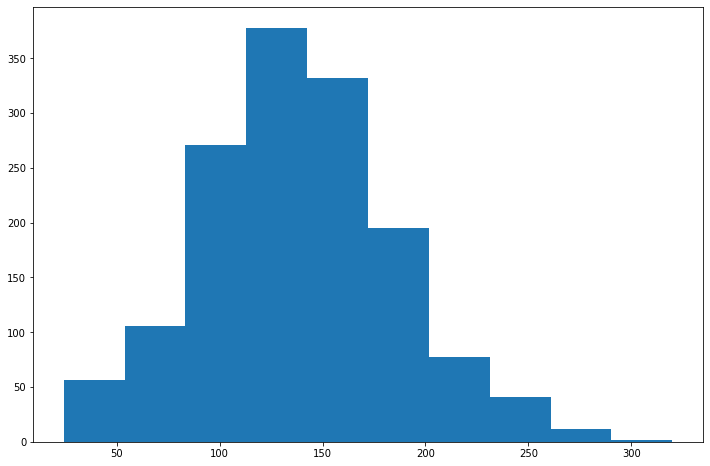

In [80]:
fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.hist(data['cost_ft'])

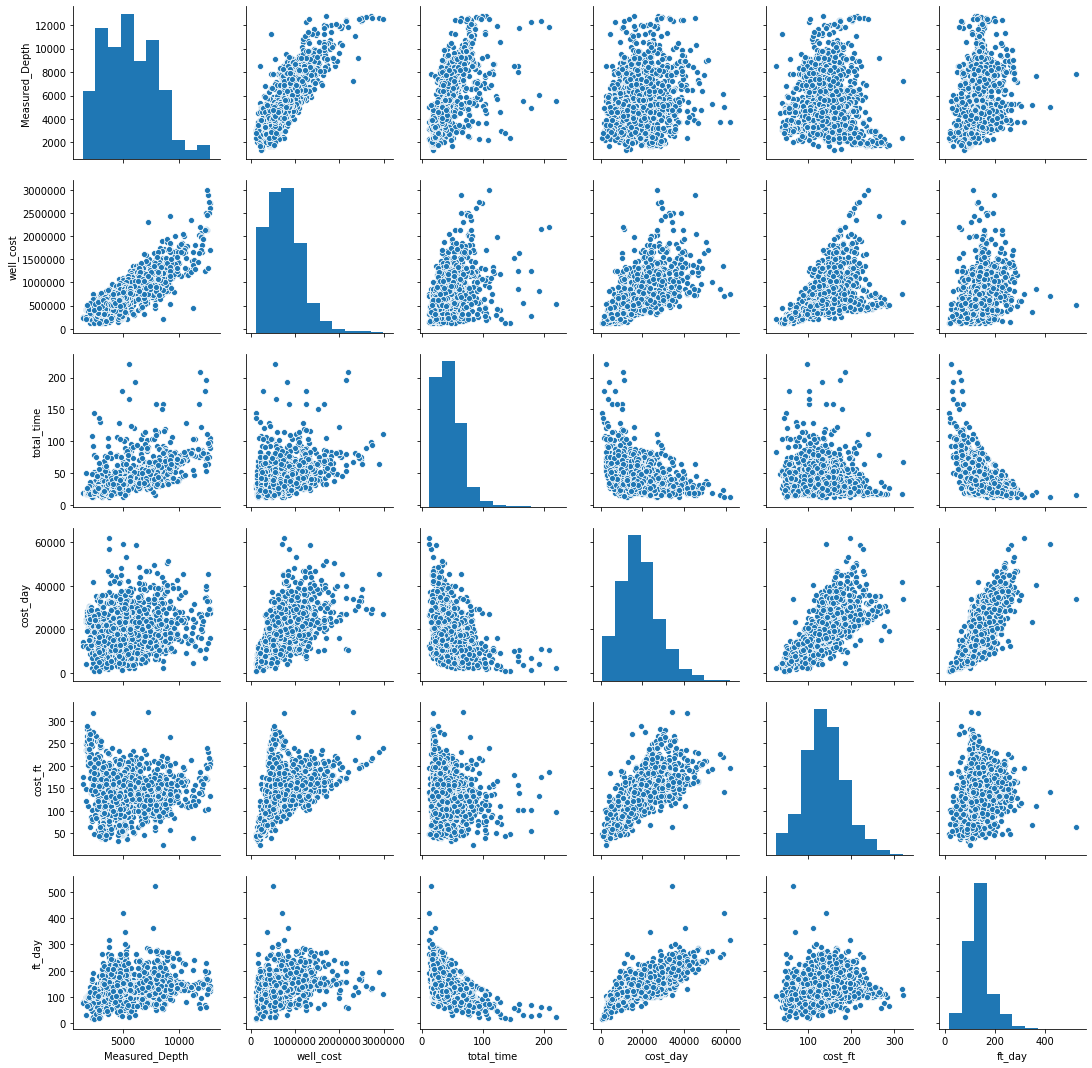

In [83]:
desired_pairs = ['Well type code', 'Reservoir', 'Measured_Depth', 'well_cost', 'total_time', 'cost_day', 'cost_ft', 'ft_day']
sns.pairplot(data = data[desired_pairs], dropna = True)